# Đề thi mẫu chứng chỉ TensorFlow - Dạng bài 05

```
ProtonX - TensorFlow Class
```
Giới thiệu về chứng chỉ - https://www.tensorflow.org/certificate

> Chú ý: đọc kỹ các nội dung trong Handle Notebook trong liên kết trên.

---

### Hướng dẫn làm bài

Một số yêu cầu:
- Sử dụng TensorFlow.

Tiêu chí chấm điểm:
- Yêu cầu MAE < 0.12




### Thực hiện

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/adib0073/TimeSeries-Using-TensorFlow/main/Data/Sunspots.csv \
    -O /tmp/sunspots.csv

--2024-02-13 16:01:44--  https://raw.githubusercontent.com/adib0073/TimeSeries-Using-TensorFlow/main/Data/Sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/plain]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.05s   

2024-02-13 16:01:44 (1.45 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



In [ ]:
import csv

sunspots = []
time_step = []

with open('/tmp/sunspots.csv',) as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  # header skip

  next(reader)

  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))
  time = np.array(time_step)
  series = np.array(sunspots)

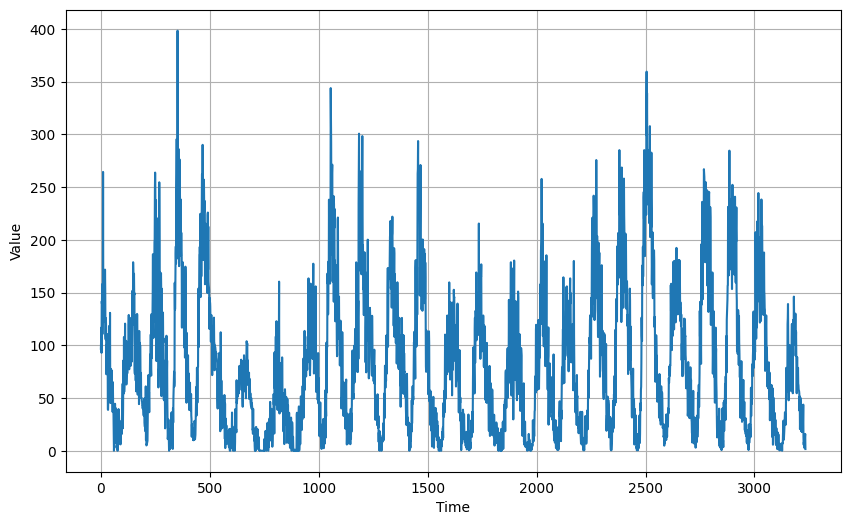

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time, series)

# Note: No Scaled

In [ ]:
batch_size = 32
window_size = 60
shuffle_buffer_size = 1000


split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
series

array([ 96.7, 104.3, 116.7, ...,  13.2,  15.9,   1.6])

# Note: Scaled

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
series = scaler.fit_transform(series.reshape(-1,1))
series = series.flatten()

In [ ]:
series

array([0.24284279, 0.26192868, 0.29306881, ..., 0.03314917, 0.03992968,
       0.00401808])

In [ ]:
batch_size = 32
window_size = 60
shuffle_buffer_size = 1000


split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def forecast(model , series, window_size):
  ds = ds.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift = 1, drop_remainder = True),
  ds = ds.flat_map(lambda w: w.batch(window_size)),
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [ ]:
train_set = windowed_dataset(x_train,
                             window_size = window_size,
                             batch_size = batch_size,
                             shuffle_buffer = shuffle_buffer_size)

valid_set = windowed_dataset(x_valid,
                             window_size = window_size,
                             batch_size = batch_size,
                             shuffle_buffer=shuffle_buffer_size)

In [ ]:
x = list(train_set.as_numpy_iterator())

In [ ]:
x[0][1].shape

(32, 60, 1)

In [ ]:
x[1][1].shape

(32, 60, 1)

In [ ]:
### Your code here
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences = True),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

In [ ]:
loss = tf.keras.losses.Huber()
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 1e-5, momentum = 0.9), loss = loss, metrics = ['mae'])

In [ ]:
train_set = windowed_dataset(x_train,
                             window_size = 60,
                             batch_size = 64,
                             shuffle_buffer = shuffle_buffer_size)
model.fit(train_set, verbose = 1, epochs = 100)

In [ ]:
# Lưu Model và nộp
model.save("mymodel.h5")